In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file1_path = '/content/drive/MyDrive/Zidio Data Analyst Project /Time Series/Stock_data_1.csv'
file2_path = '/content/drive/MyDrive/Zidio Data Analyst Project /Time Series/Stock_data_2.csv'


# **Step 1: Setup and Install Required Libraries**

In [4]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels prophet tensorflow streamlit yfinance --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


# **Step 2: Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# **Step 3: Load and Explore the Data**

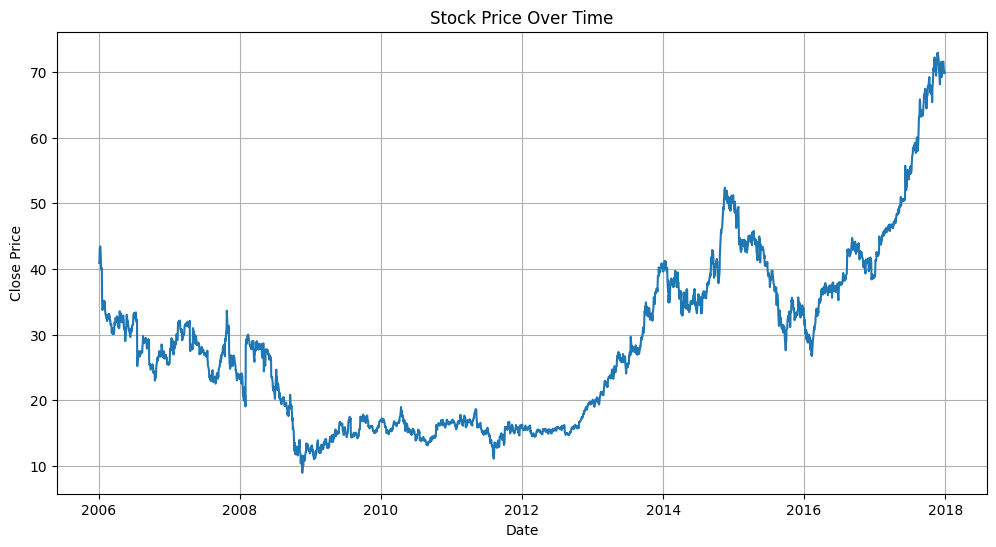

              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     28.426479    28.766532    28.066558    28.412726  2.158391e+07
std      13.257242    13.356692    13.157326    13.258163  1.926231e+07
min       9.100000     9.480000     8.940000     8.950000  1.939061e+06
25%      16.175000    16.385000    15.970000    16.130000  1.248025e+07
50%      27.180000    27.490000    26.820000    27.100000  1.732130e+07
75%      36.655000    37.035000    36.305000    36.635000  2.512757e+07
max      73.020000    73.250000    72.460000    72.930000  4.382317e+08


In [6]:
# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Zidio Data Analyst Project /Time Series/Stock_data_1.csv')  # or from Google Drive if needed
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Visualize raw data
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()

# Basic stats
print(data.describe())


# **Step 4: Prophet Forecasting**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaltqfhdl/mpjko1x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaltqfhdl/5j0jqctj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72841', 'data', 'file=/tmp/tmpaltqfhdl/mpjko1x_.json', 'init=/tmp/tmpaltqfhdl/5j0jqctj.json', 'output', 'file=/tmp/tmpaltqfhdl/prophet_modelwsyeumdj/prophet_model-20250621161511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


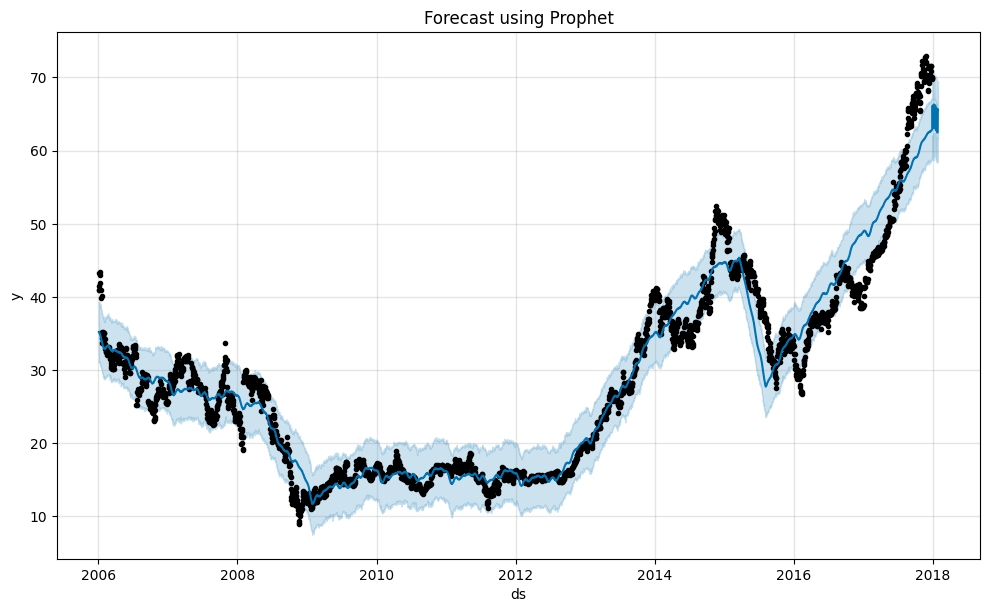

In [7]:
df_prophet = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

model_prophet.plot(forecast)
plt.title('Forecast using Prophet')
plt.show()


# **Step 5: ARIMA Forecasting**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

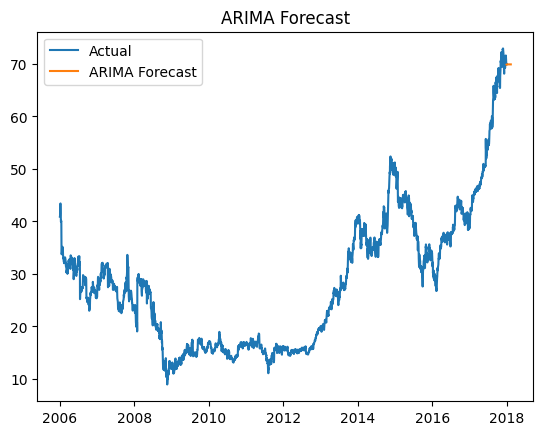

In [9]:
model_arima = ARIMA(data['Close'], order=(5,1,0))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=30)

plt.plot(data['Close'], label='Actual')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


# **Step 6: SARIMA Forecasting**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

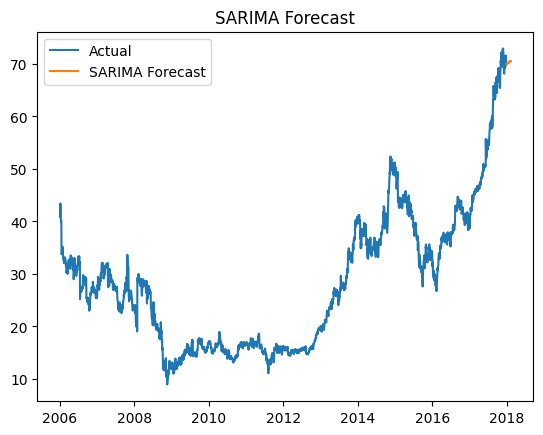

In [10]:
model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(steps=30)

plt.plot(data['Close'], label='Actual')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()


# **Step 7: LSTM Forecasting**

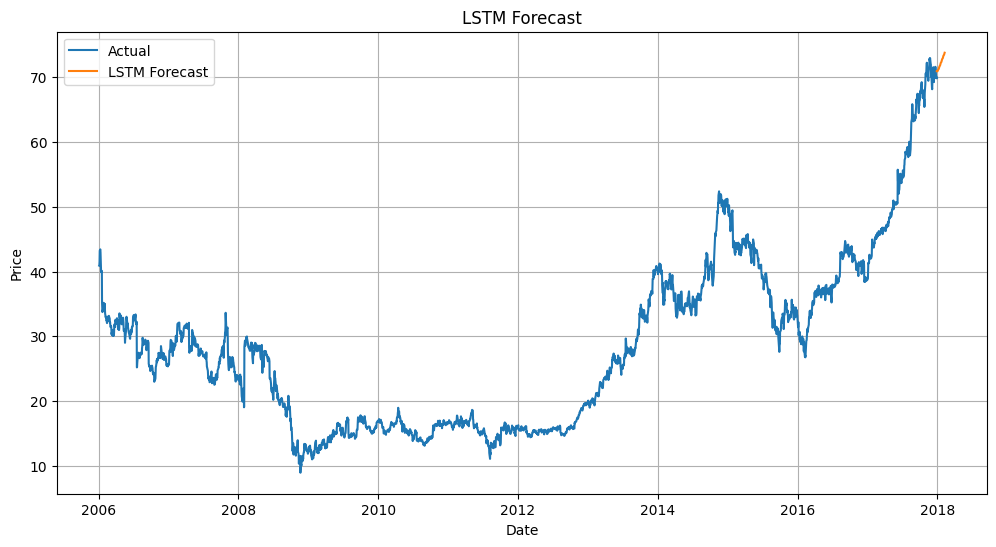

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Create dataset function
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Create training data
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model (using Input layer to avoid warning)
model_lstm = Sequential()
model_lstm.add(Input(shape=(time_step, 1)))  # Avoids warning
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Forecasting next 30 points
temp_input = list(scaled_data[-time_step:, 0])  # Flatten to 1D list
output = []

for i in range(30):
    lstm_input_arr = np.array(temp_input[-time_step:]).reshape(1, time_step, 1)
    pred = model_lstm.predict(lstm_input_arr, verbose=0)
    output.append(pred[0][0])
    temp_input.append(pred[0][0])  # Append scalar, not array

# Inverse scaling
lstm_forecast = scaler.inverse_transform(np.array(output).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual')
forecast_dates = pd.date_range(data.index[-1], periods=30, freq='B')  # 'B' for business days
plt.plot(forecast_dates, lstm_forecast, label='LSTM Forecast')
plt.legend()
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# **Step 8: Model Evaluation (RMSE)**


In [15]:
actual = data['Close'][-30:]

rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))
rmse_sarima = np.sqrt(mean_squared_error(actual, forecast_sarima))
rmse_prophet = np.sqrt(mean_squared_error(actual, forecast['yhat'][-30:]))
rmse_lstm = np.sqrt(mean_squared_error(actual, lstm_forecast[-30:]))

print("Model RMSE Scores:")
print(f"Prophet: {rmse_prophet:.2f}")
print(f"ARIMA: {rmse_arima:.2f}")
print(f"SARIMA: {rmse_sarima:.2f}")
print(f"LSTM: {rmse_lstm:.2f}")


Model RMSE Scores:
Prophet: 7.01
ARIMA: 1.42
SARIMA: 1.34
LSTM: 2.33


# **Step 9: Visual Dashboard (Optional Streamlit)**

In [16]:
import streamlit as st

st.title("📈 Stock Forecast Dashboard")

st.subheader("📊 Original Closing Price")
st.line_chart(data['Close'])

st.subheader("📈 Prophet Forecast")
st.line_chart(forecast[['ds', 'yhat']].set_index('ds').tail(30))

st.subheader("🔁 ARIMA Forecast")
st.line_chart(forecast_arima)

st.subheader("🌦 SARIMA Forecast")
st.line_chart(forecast_sarima)

st.subheader("🧠 LSTM Forecast")
st.line_chart(pd.Series(lstm_forecast.flatten(), index=pd.date_range(data.index[-1], periods=30, freq='B')))

st.subheader("✅ Model RMSE Comparison")
st.write(f"📉 Prophet: {rmse_prophet:.2f}")
st.write(f"🔁 ARIMA: {rmse_arima:.2f}")
st.write(f"🌦 SARIMA: {rmse_sarima:.2f}")
st.write(f"🧠 LSTM: {rmse_lstm:.2f}")


2025-06-21 16:26:23.157 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 16:26:23.298 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-21 16:26:23.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 16:26:23.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 16:26:23.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 16:26:23.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 16:26:23.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 16:26:23.722 Thread 'MainThread': mi

# **We Can Add for Productive & Insightful Analysis**

# **1. Moving Averages & Trends**

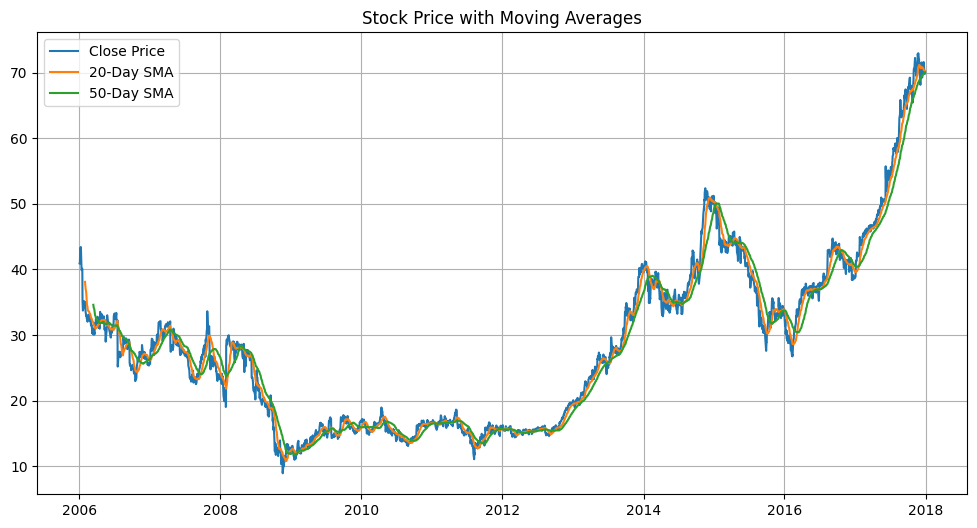

In [17]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='20-Day SMA')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.legend()
plt.title('Stock Price with Moving Averages')
plt.grid(True)
plt.show()


# **2. Volatility Detection**

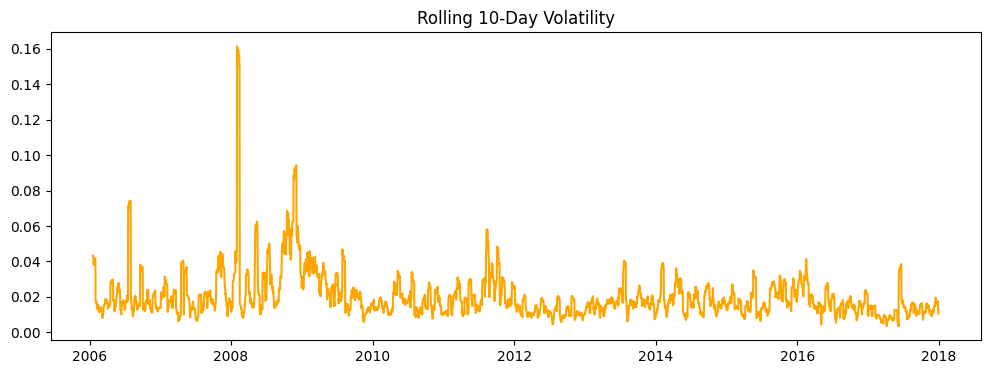

In [18]:
data['Daily Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily Return'].rolling(window=10).std()

plt.figure(figsize=(12,4))
plt.plot(data['Volatility'], color='orange')
plt.title('Rolling 10-Day Volatility')
plt.show()


# **3. Volume vs Price Relationship**

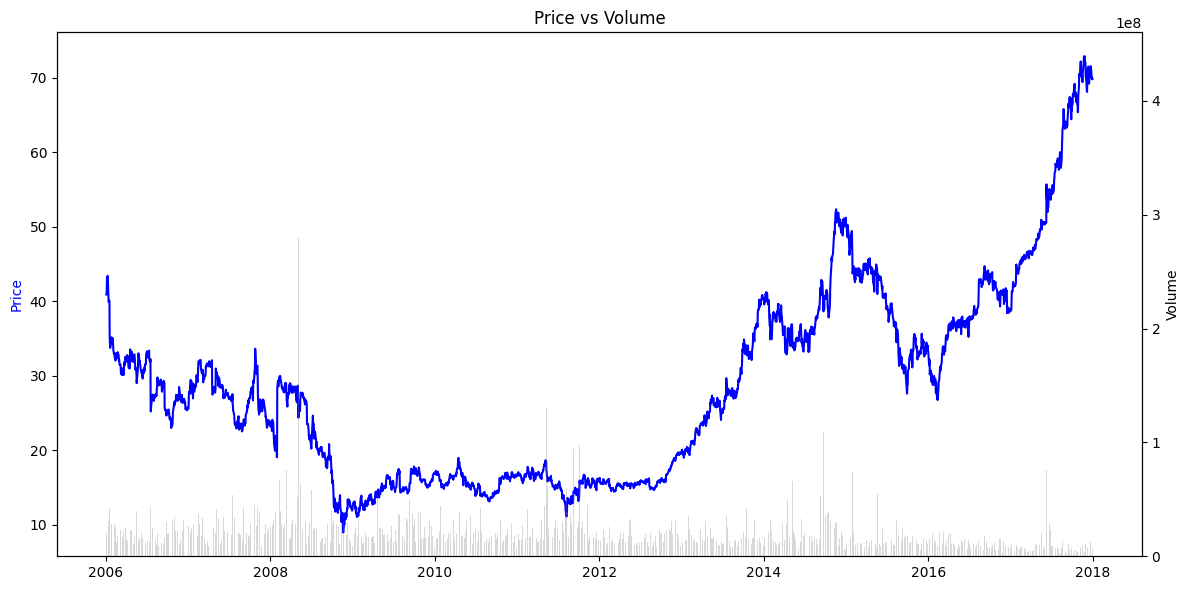

In [19]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(data['Close'], color='blue', label='Close Price')
ax1.set_ylabel('Price', color='blue')

ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], alpha=0.3, color='gray', label='Volume')
ax2.set_ylabel('Volume')

plt.title("Price vs Volume")
fig.tight_layout()
plt.show()


# **4. Seasonality Decomposition (Trend/Seasonality/Noise)**

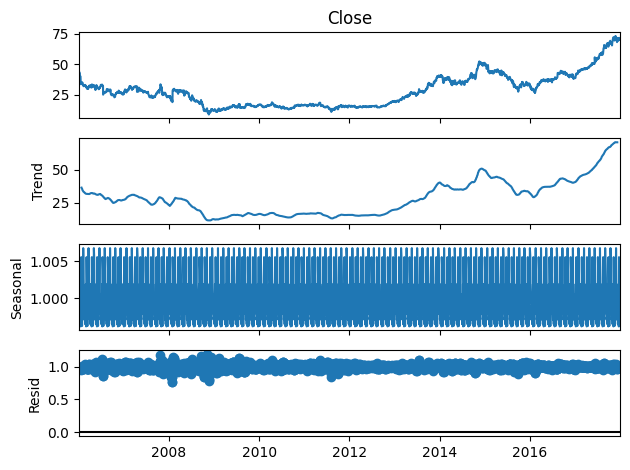

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(data['Close'], model='multiplicative', period=30)
decompose_result.plot()
plt.tight_layout()
plt.show()


# **5. Drawdowns: Risk Measurement**

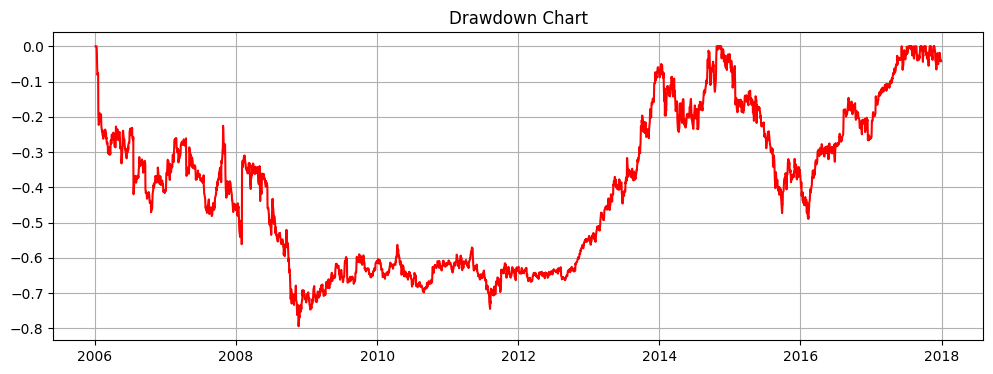

In [21]:
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()
data['Cumulative Max'] = data['Cumulative Return'].cummax()
data['Drawdown'] = data['Cumulative Return'] / data['Cumulative Max'] - 1

plt.figure(figsize=(12,4))
plt.plot(data['Drawdown'], color='red')
plt.title('Drawdown Chart')
plt.grid()
plt.show()

# **6. Prediction Confidence Intervals**

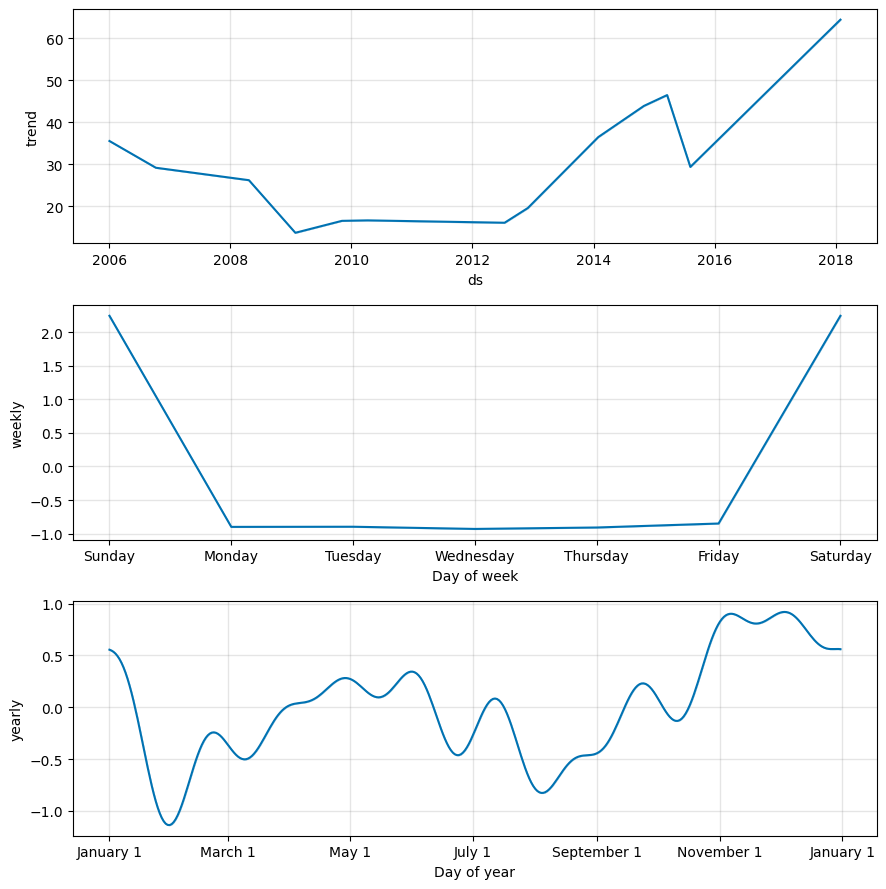

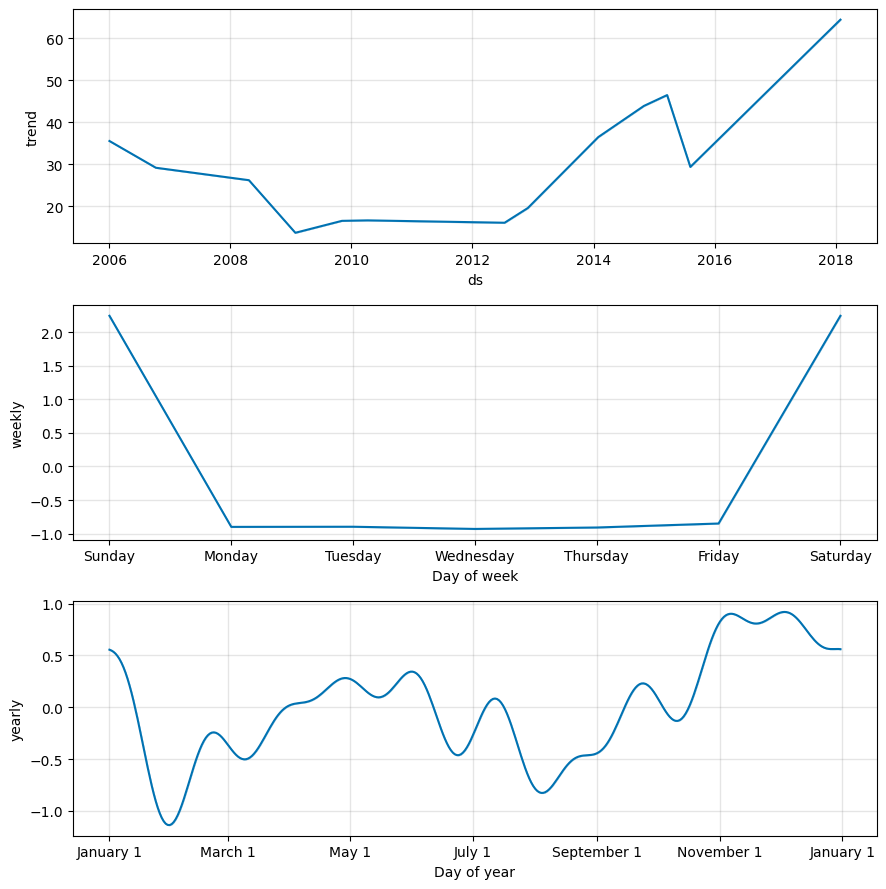

In [22]:
# Already done in Prophet
model_prophet.plot_components(forecast)


# **7. Simple Buy/Sell Strategy Simulation (Bonus)**

/tmp/ipython-input-23-2437337913.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1.0, 0.0)
/tmp/ipython-input-23-2437337913.py:2: SettingWithCopyWarning: 
A value 

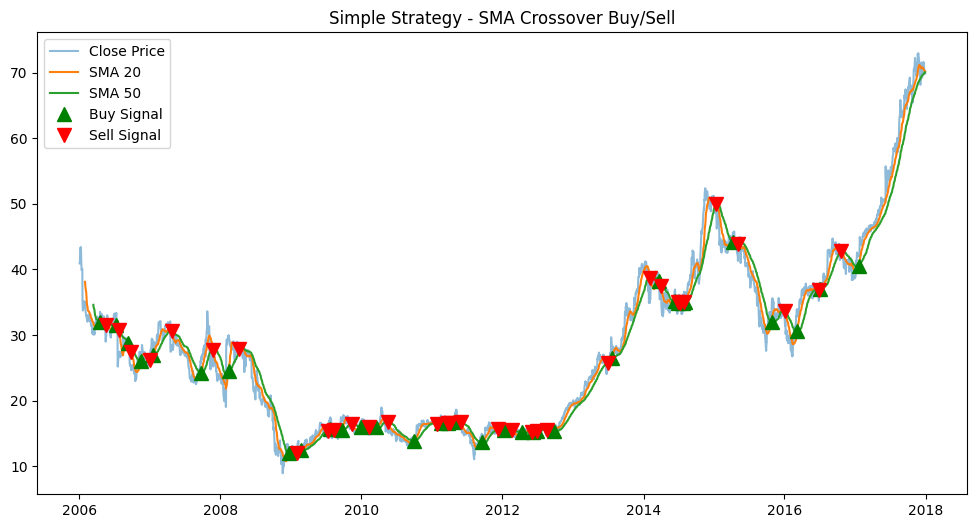

In [23]:
data['Signal'] = 0.0
data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1.0, 0.0)
data['Position'] = data['Signal'].diff()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['SMA_50'], label='SMA 50')

# Buy signal
plt.plot(data[data['Position'] == 1].index,
         data['SMA_20'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Sell signal
plt.plot(data[data['Position'] == -1].index,
         data['SMA_20'][data['Position'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.legend()
plt.title('Simple Strategy - SMA Crossover Buy/Sell')
plt.show()


✅ Summary for Documentation
Add this in your final report / README:

“Beyond just forecasting, we analyzed volatility, moving averages, seasonality, volume relationships, and drawdowns — which are critical for understanding stock behavior. We even simulated basic strategies to evaluate potential trading signals from the data.”

